
**Mid-sem Exam (14 Mar 2023  2-4pm)**
    

**General instructions**

* Solutions are to be typed in the `.ipynb` file provided and uploaded in the lab course page in Moodle before 4pm. 
* Your code should be well commented and should be compatible with python3.


# Monty Hall Game (4 marks)

Recall the Monty Hall game discussed in Assignment 1. Consider the variant of the game where there are $n$ boxes with $n \geq 3$ and the host reveals the contents of $n-2$ boxes. Is it to your advantage to switch your choice in order to get the gift? How does this advantage change with $n$?


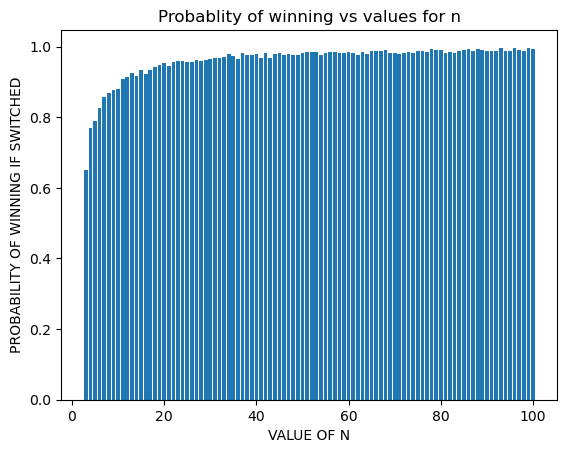

In [1]:
import random as rnd
import matplotlib.pyplot as plt

def montyHall(n: int):
  isGift = [0 for _ in range(n)]
  giftIndex = rnd.randrange(0,n)
  firstChoice = rnd.randrange(0,n)
  # assuming monty opened all boxes which are neither gift box or the box which the player chose
  montyOpenedDoors = [
    i for i in range(n) if i!=giftIndex and i!=firstChoice
  ]
  if firstChoice == giftIndex:
    # if switching leads to losing the gift, we return False
    return False
  else:
    return True
  
def probability_win(n: int):
  count_wins = 0
  for _ in range(1000):
    if montyHall(n):
      count_wins += 1
  
  return count_wins / 1000


n_value = [ i for i in range(3,101)]
probabilty_n = [
  probability_win(i) for i in range(3,101)
]

plt.xlabel('VALUE OF N')
plt.ylabel('PROBABILITY OF WINNING IF SWITCHED')
plt.title('Probablity of winning vs values for n')
plt.bar(n_value,probabilty_n)
plt.show()

# Area and $\pi$ Estimation (6 marks)

(a) Write a function `generatePoint(m,n)` that takes as arguments two integers $m$, $n$ and returns a pair of numbers $(x,y)$ such that $x,y \in_R [m,n]$. Here, $[m,n]$ denotes the set of all real numbers between $m$ and $n$ (including $m$ and $n$) and $x,y \in_R [m,n]$ denotes that both $x$ and $y$ are picked uniformly at random from $[m,n]$.  

In [2]:
import random as rnd

def generatePoint(m: int, n:int):
  x = m + rnd.random()*abs(n-m)
  y = m + rnd.random()*abs(n-m)
  return x,y

(b) Each point $(x,y)$ returned by `generatePoint(0,1)` may be interpreted as a point chosen at random from the unit square whose bottom left vertex is $(0,0)$. Write a function that estimates the area of the region under the curve $y=x^2$ in this unit square. 

In [3]:

# estimate area of parabola under the curve y = x squared

z = int(1e6)

num_points_under_parabola = 0
for _ in range(z):
  x,y = generatePoint(0,1)
  if y < x*x:
    num_points_under_parabola += 1

area_of_parabola = num_points_under_parabola / z

print('The area of the region under the parabola y = x^2 where x is from 0 to 1 is')
print(area_of_parabola)


The area of the region under the parabola y = x^2 where x is from 0 to 1 is
0.334345


(c) Write a function that estimates the value of $\pi$ using `generatePoint(0,1)`. Hint: you may want to estimate the area of the circle with center $(1/2,1/2)$ and radius $1/2$.

In [4]:
num_points_inside_circle = 0
for _ in range(z):
  x,y = generatePoint(0,1)
  if (x-0.5)**2 + (y-0.5)**2 <= 0.25:
    num_points_inside_circle += 1

area_of_circle = num_points_inside_circle / z

pi_approx = 4 * area_of_circle
print(f'The approximate value of pi is {pi_approx}')



The approximate value of pi is 3.142412


# Erdős Number Computation (10 marks)

The Erdős number of a scientist $X$ describes the "collaborative distance" between the mathematician Paul Erdős and $X$. Paul Erdős himself is assigned an Erdős number of zero. Scientists who have coauthored a research paper with Erdős have Erdős number 1, scientists who have collaborated with scientists having Erdős number 1 but not with Erdős have an Erdős number of 2, and so on. That is, a scientist has a finite Erdős number, say $i \geq 1$, if and only if she has collaborated with a scientist having Erdős number $i-1$ but not with anyone who has an Erdős number less than $i-1$. 

Write  a program that takes a csv file as input and displays the Erdős number of all scientists in it. Each line in the csv file is of the form Scientist 1,Scientist 2 indicating that these two scientists have collaborated. Example: The entry `Alon,Erdos` indicates that Erdős and Alon have a research paper together. You may use the following code block to read from a csv file.

```
import csv

with open('collab.csv') as csvfile:
    csvreader = csv.reader(csvfile)
```
Here, `with open('collab.csv') as csvfile:` opens the CSV file named `collab.csv` and creates a file object named csvfile. The with statement ensures that the file is properly closed after the code block completes or in case of an error.
`csvreader = csv.reader(csvfile)` creates a CSV reader object named `csvreader` which can be used to iterate over the rows of the CSV file. For example, 
```
for row in csvreader: 
```
iterates over each row in the CSV file Each row is treated as a list of strings representing the columns in the CSV file. That is, `row[0]` denotes the first column and `row[1]` denotes the second column.

In [5]:
import queue
import csv

In [6]:
class Scientist:
  def __init__(self,name: str) -> None:
    self.name = name
    self.isVisited = False
    self.erdoNumber = -1
    self.collab_list = list()

  def __gt__(self, other):
    return isinstance(other, Scientist) and self.erdoNumber > other.erdoNumber
  def __lt__(self, other):
    return isinstance(other, Scientist) and self.erdoNumber < other.erdoNumber


In [7]:

class Graph:
  def __init__(self, n: int, m: int, scientist_name_list: list[str]) -> None:
    self.num_vertices = n
    self.num_edges = m
    self.vertices_list = [
      Scientist(scientist) for scientist in scientist_name_list
    ]
    self.vertices_dictionary = dict()
    for scientist in self.vertices_list:
      self.vertices_dictionary[scientist.name] = scientist
    

  def addEdge(self, name1: str, name2: str):
    try:
      scientist1 = self.vertices_dictionary[name1]
      scientist2 = self.vertices_dictionary[name2]
      scientist1: Scientist
      scientist2: Scientist
      scientist1.collab_list.append(scientist2)
      scientist2.collab_list.append(scientist1)
    except:
      print(f'one of the scientist name not found')


  def bfs(self,name: str):
    scientist_dictionary = self.vertices_dictionary
    for scientist in self.vertices_list:
      scientist.erdoNumber = -1
      scientist.isVisited = False
    
    try:
      source = scientist_dictionary[name]
      source: Scientist
      source.erdoNumber = 0
    except:
      print(f'The name {name} not found')
      return
    
    q = queue.Queue()
    q.put(source)
    while not q.qsize() == 0:
      current_scientist = q.get()
      current_scientist: Scientist
      current_scientist.isVisited = True
      for neighbour in current_scientist.collab_list:
        neighbour: Scientist
        if neighbour.isVisited == False:
          neighbour.erdoNumber = current_scientist.erdoNumber + 1
          q.put(neighbour)

  def printErdoNumber(self):
    for scientist in self.vertices_list:
      scientist: Scientist
      print(f'The erdo number of scientist {scientist.name} is {scientist.erdoNumber}')

    print()
    print()

    scientist_list = list(self.vertices_list)
    scientist_list.sort()

    erdo_number_dictionary = dict()
    for scientist in scientist_list:
      try:
        x = erdo_number_dictionary[scientist.erdoNumber]
        x: list
        x.append(scientist)
      except:
        erdo_number_dictionary[scientist.erdoNumber] = [scientist]

    for key in erdo_number_dictionary.keys():
      if key ==  -1:
        print('The scientist(s) having no erdo numbers are ')
        erdo_number_list = erdo_number_dictionary[key]
        erdo_number_list: list
        length = len(erdo_number_list)
        for i in range(length):
          scientist = erdo_number_list[i]
          if i == length - 1:
            print(scientist.name)
            print()
          else:
            print(scientist.name, end=', ')
            # print()
      
      else:
        print(f'The scientist having erdo number as {key} are')
        erdo_number_list = erdo_number_dictionary[key]
        erdo_number_list: list
        length = len(erdo_number_list)
        for i in range(length):
          scientist = erdo_number_list[i]
          scientist: Scientist
          if i == length - 1:
            print(scientist.name)
            print()
          else:
            print(scientist.name, end=', ')
            # print()
    del erdo_number_dictionary



In [8]:
with open('./collab.csv','r') as file:
  csvreader = csv.reader(file)
  unique_name_list = []
  file_content_list = []
  for row in csvreader:
    file_content_list.append(row)
    for name in row:
      if name not in unique_name_list:
        unique_name_list.append(name)


    
  graph = Graph(len(unique_name_list), 2*len(file_content_list), unique_name_list)
  for edge in file_content_list:
    graph.addEdge(edge[0],edge[1])
  # according to the question, we have to start with ERDOS
  graph.bfs('ERDOS')
  graph.printErdoNumber()



The erdo number of scientist AHARONI is 4
The erdo number of scientist KOMJATH is 3
The erdo number of scientist LINIAL is 5
The erdo number of scientist MARTIN LOEBL is 8
The erdo number of scientist PENNY HAXELL is 9
The erdo number of scientist THOMASSEN is 7
The erdo number of scientist ALAN HARTMAN is 5
The erdo number of scientist COLBOURN is 3
The erdo number of scientist DEAN HOFFMAN is 8
The erdo number of scientist ERIC MENDELSOHN is 8
The erdo number of scientist KATHERINE HEINRICH is 8
The erdo number of scientist PHELPS is 4
The erdo number of scientist ROSA is 8
The erdo number of scientist STINSON is 9
The erdo number of scientist ALON is 1
The erdo number of scientist BOLLOBAS is 2
The erdo number of scientist ERDOS is 0
The erdo number of scientist FAN CHUNG is 3
The erdo number of scientist FRANKL is 4
The erdo number of scientist FUREDI is 2
The erdo number of scientist GIL KALAI is 4
The erdo number of scientist HAJNAL is 2
The erdo number of scientist KLEITMAN is 3